In [1]:
import pyAMARES
pyAMARES.__version__

'0.3.21'

# Examples of In Vivo X-Nuclei ($^{129}$Xe and $^{2}$H) MRS Fitting
- Reproduce Figures 2B, C and Figures S2C, D of the [pyAMARES publication](https://doi.org/10.3390/diagnostics14232668)

**[Try this tutorial on Google Colab!](https://colab.research.google.com/drive/1HGFB0G0NuHxpa2lfUAx-_sGkKx7QwVeO)**

## Fitting a Voxel of Hyperpolarized $^{129}$Xe MRSI Acquired from Healthy Porcine Lungs at 3T 
- **Set Scanner Parameters**:
    - **MHz (Field Strength)**: 35.340772 MHz, corresponding to $^{129}$Xe at 3T
    - **sw (Spectral Width)**: 20000 Hz
    - **Deadtime**: 7.14e-05 seconds

In [2]:
MHz = 35.340772
sw = 20000
begin_time = 7.14e-05

- **Load the FID of an Example Voxel of** $^{129}$Xe MRSI

In [3]:
fid = pyAMARES.readmrs('attachment/a_voxel_Xe.txt')

Try to load 2-column ASCII data
data.shape= (256,)


- **Initialize the FID Object**

Checking comment lines in the prior knowledge file
Parameter g will be fit with the initial value set in the file attachment/FigS2A.csv


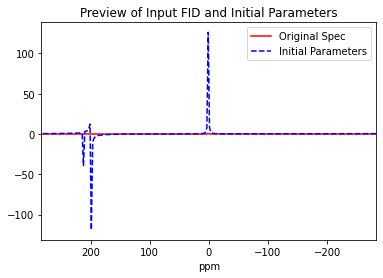

Printing the Prior Knowledge File attachment/FigS2A.csv


,Gas,Membrane,RBC
Index,,,
Initial Values,NaN,NaN,NaN
amplitude,1,0.6,0.2
chemicalshift,0,197,210
linewidth,40,10,10
phase,0,0,Membrane
g,0,0.1,0
Bounds,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,"
chemicalshift,"(-25,25)","(192, 205)","(200,215)"


In [4]:
# Initialize an FIDobj using the loaded fid and spectral parameters
FIDobj = pyAMARES.initialize_FID(fid,
                                priorknowledgefile='attachment/FigS2A.csv',  # Prior knowledge file for hyperpolarized 129Xe
                                MHz=MHz,
                                sw=sw,
                                deadtime=begin_time,
                                preview=True,
                                g_global=False)  # When g_global is False, the lineshape parameter `g` will be fitted based on prior knowledge constraints

- Note: In the prior knowledge dataset, **the gas and red blood cell (RBC) signals are modeled with Lorentzian lineshapes (g = 0), while the membrane signal is modeled with a Voigt lineshape (initial value: g = 0.1)** to account for its structural heterogeneity. This approach has become widely accepted in the xenon MRS community for quantifying membrane and RBC signals [Bier et al., NMR Biomed. 2019](https://doi.org/10.1002/nbm.4029)

- **First Round of Fitting: Parameter Optimization**

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 7.601e-08
Fitting with method=leastsq took 0.231262 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
a_sd is all None, use crlb instead!
freq_sd is all None, use crlb instead!
lw_sd is all None, use crlb instead!
phase_sd is all None, use crlb instead!
g_std is all None, use crlb instead!
It seems that zeros are padded after 85
Remove padded zeros from residual estimation!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 1000
Reduced chi-squared (redchi): 6.892370384435103e-06
Fit success status: Failure
Fit message: Tolerance seems to be too small. Could not estimate error-bars.
Norm of residual = 0.003
Norm of the data = 0.000
resNormSq / dataNormSq = 23.631


/home/jxu125/git/pyamares/pyAMARES/util/crlb.py:54: RuntimeWarning: Warning: The matrix may be ill-conditioned. Condition number is high: 1.965e+19
  warnings.warn(


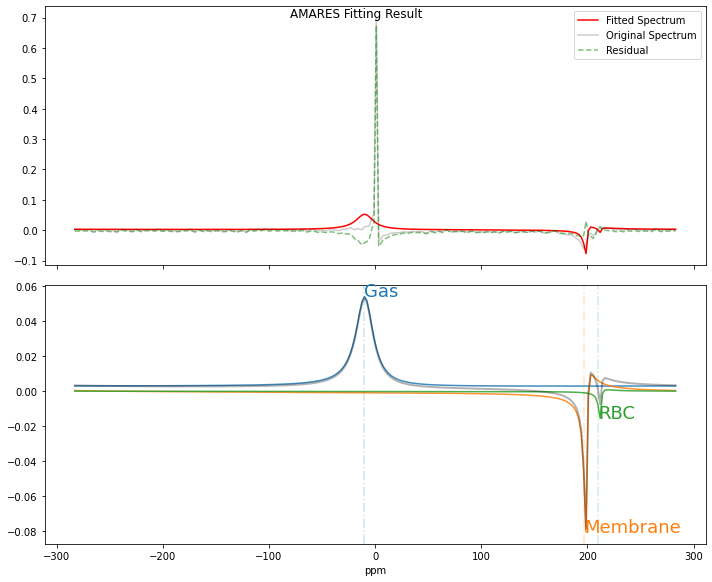

In [5]:
out1 = pyAMARES.fitAMARES(fid_parameters=FIDobj,
                          fitting_parameters=FIDobj.initialParams,
                          method='leastsq',  # Initialize parameters using the Levenberg-Marquardt method
                          ifplot=True,
                          inplace=False)

- **Optimized Fitting Parameters**

In [6]:
out1.fittedParams

name,value,initial value,min,max,vary,expression
ak_Gas,0.00652552,1.0,0.00000000,inf,True,
freq_Gas,-379.033205,0.0,-883.519300,883.519300,True,
dk_Gas,2182.09753,125.66370614359172,0.00000000,inf,True,
phi_Gas,0.11411036,0.0,-3.14159265,3.14159265,True,
g_Gas,5.6341e-09,0.0,0.00000000,1.00000000,True,
ak_Membrane,0.00164767,0.6,0.00000000,inf,True,
freq_Membrane,6965.79679,6962.132084,6785.42822,7244.85826,True,
dk_Membrane,351.070545,31.41592653589793,0.00000000,628.318531,True,
phi_Membrane,-0.65148111,0.0,-3.14159265,3.14159265,True,
g_Membrane,5.7732e-15,0.1,0.00000000,1.00000000,True,


- **Fix Lineshape Parameters of Gas and RBC for the AMARES Fitting**

In [7]:
out1.fittedParams['g_Gas'].vary = False
out1.fittedParams['g_RBC'].vary = False

In [8]:
out1.fittedParams

name,value,initial value,min,max,vary,expression
ak_Gas,0.00652552,1.0,0.00000000,inf,True,
freq_Gas,-379.033205,0.0,-883.519300,883.519300,True,
dk_Gas,2182.09753,125.66370614359172,0.00000000,inf,True,
phi_Gas,0.11411036,0.0,-3.14159265,3.14159265,True,
g_Gas,5.6341e-09,0.0,0.00000000,1.00000000,False,
ak_Membrane,0.00164767,0.6,0.00000000,inf,True,
freq_Membrane,6965.79679,6962.132084,6785.42822,7244.85826,True,
dk_Membrane,351.070545,31.41592653589793,0.00000000,628.318531,True,
phi_Membrane,-0.65148111,0.0,-3.14159265,3.14159265,True,
g_Membrane,5.7732e-15,0.1,0.00000000,1.00000000,True,


- **Fitting AMARES Using Levenberg-Marquardt-Initialized Parameters:**

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 7.601e-08
Fitting with method=least_squares took 0.125702 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
It seems that zeros are padded after 85
Remove padded zeros from residual estimation!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 46
Reduced chi-squared (redchi): 3.930007675969261e-08
Fit success status: Success
Fit message: `gtol` termination condition is satisfied.
Norm of residual = 0.000
Norm of the data = 0.000
resNormSq / dataNormSq = 0.135


/home/jxu125/git/pyamares/pyAMARES/util/crlb.py:54: RuntimeWarning: Warning: The matrix may be ill-conditioned. Condition number is high: 2.980e+18
  warnings.warn(


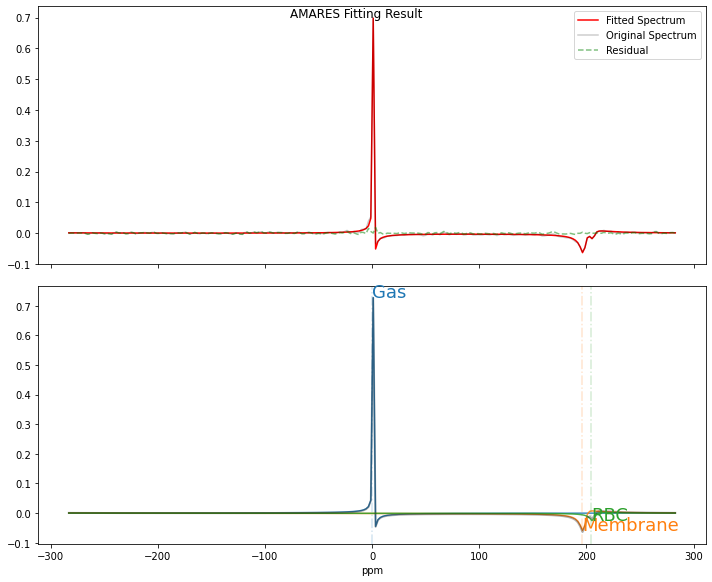

In [9]:
out2 = pyAMARES.fitAMARES(fid_parameters=out1,
                          fitting_parameters=out1.fittedParams, # Fit Xenon data using optimized parameters with fixed g_Gas and g_RBC
                          method='least_squares', 
                          ifplot=True,
                          inplace=False)

- **Visualization of AMARES Fitting as shown in Figure 2B** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [10]:
# Modify the visualization parameters
plotParameters = out2.plotParameters
plotParameters.xlim = (300, -300)  # Show spectrum from 300 to -300 ppm
plotParameters.ifphase = False  # Do not apply phase correction
plotParameters.lb = 5  # Apply line broadening of 5 Hz for visualization

fitting_parameters is None, just use the fid_parameters.out_obj.params


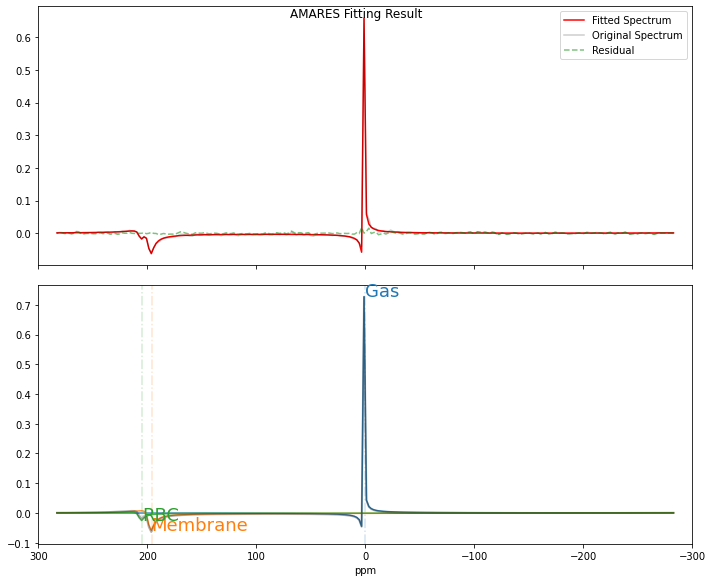

In [11]:
pyAMARES.plotAMARES(out2, plotParameters=plotParameters)

- **Obtained Fitting Results Spreadsheet as shown in Figure S2C** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [12]:
out2.simple_df 

,amplitude,chem shift(ppm),LW(Hz),phase(deg),SNR,CRLB(%)
name,,,,,,
Gas,0.004,0.062,6.106,-44.828,10.185,0.487
Membrane,0.002,196.127,200.000,-39.198,5.355,4.745
RBC,0.001,204.617,200.000,-39.198,2.156,12.295


## Fitting a Voxel of $^{2}$H 3D MRSI Acquired at 3T 
- **Set Scanner Parameters**:
    - **MHz (Field Strength)**: 19.613053 MHz, corresponding to $^{2}$H at 3T
    - **sw (Spectral Width)**: 5000 Hz
    - **Deadtime**: 0 seconds

In [13]:
MHz = 19.613053
sw = 5000
begin_time = 0

- **Load the FID of an Example Voxel** of $^{2}$H 3D MRSI

In [14]:
fid = pyAMARES.readmrs('attachment/a_voxel_2HMRSI.txt')
fid.shape

Try to load 2-column ASCII data
data.shape= (1400,)


(1400,)

- **Initialize the FID Object**

Checking comment lines in the prior knowledge file
Shifting the ppm by ppm_offset=-4.70 ppm
before opts.initialParams[freq_DHO].value=92.1813491
new value should be opts.initialParams[freq_DHO].value + opts.ppm_offset * opts.MHz=0.0
after opts.initialParams[freq_DHO].value=0.0
before opts.initialParams[freq_Glucose].value=74.5296014
new value should be opts.initialParams[freq_Glucose].value + opts.ppm_offset * opts.MHz=-17.6517477
after opts.initialParams[freq_Glucose].value=-17.6517477
before opts.initialParams[freq_Glx].value=45.1100219
new value should be opts.initialParams[freq_Glx].value + opts.ppm_offset * opts.MHz=-47.071327200000006
after opts.initialParams[freq_Glx].value=-47.071327200000006
before opts.initialParams[freq_Lactate].value=25.496968900000002
new value should be opts.initialParams[freq_Lactate].value + opts.ppm_offset * opts.MHz=-66.6843802
after opts.initialParams[freq_Lactate].value=-66.6843802


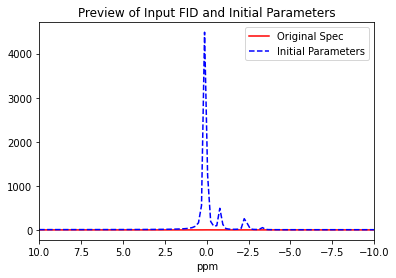

Printing the Prior Knowledge File attachment/FigS2B.csv


,DHO,Glucose,Glx,Lactate
Index,,,,
Initial Values,NaN,NaN,NaN,NaN
amplitude,10,1,0.7,0.1
chemicalshift,4.7,3.8,2.3,1.3
linewidth,10,10,10,10
phase,0,DHO,DHO,DHO
g,0,0,0,0
Bounds,NaN,NaN,NaN,NaN
amplitude,"(0,","(0,","(0,","(0,"
chemicalshift,"(4.2, 5.2)","(3.3, 4.3)","(1.8,2.8)","(0.8, 1.8)"


In [15]:
FIDobj = pyAMARES.initialize_FID(fid,
                                priorknowledgefile='attachment/FigS2B.csv',  # Prior knowledge file for 2H 3D MRSI analysis
                                MHz=MHz,
                                sw=sw,
                                deadtime=begin_time,
                                preview=True,
                                xlim=(10, -10),  # Spectral visualization range: -10 to 10 ppm
                                ppm_offset=-4.7,  # Adjust DHO peak to 0 ppm by setting ppm_offset to -4.7 ppm 
                                g_global=0.8,     # Set Voigt lineshape g=0.8
)

- **AMARES Fitting with an Internal Levenberg-Marquardt Parameter Initializer**

A copy of the input fid_parameters will be returned because inplace=False
Autogenerated tol is 1.109e-07
Run internal leastsq initializer to optimize fitting parameters for the next least_squares fitting
Fitting with method=leastsq took 0.600929 seconds
Fitting with method=least_squares took 0.270947 seconds
Estimated CRLBs are calculated using the default noise variance estimation used by OXSA.
It seems that zeros are padded after 700
Remove padded zeros from residual estimation!
Lmfit Fitting Results:
----------------
Number of function evaluations (nfev): 5
Reduced chi-squared (redchi): 9.417199596703771e-07
Fit success status: Success
Fit message: `ftol` termination condition is satisfied.
Norm of residual = 0.003
Norm of the data = 0.005
resNormSq / dataNormSq = 0.569


/home/jxu125/git/pyamares/pyAMARES/util/crlb.py:54: RuntimeWarning: Warning: The matrix may be ill-conditioned. Condition number is high: 4.480e+12
  warnings.warn(


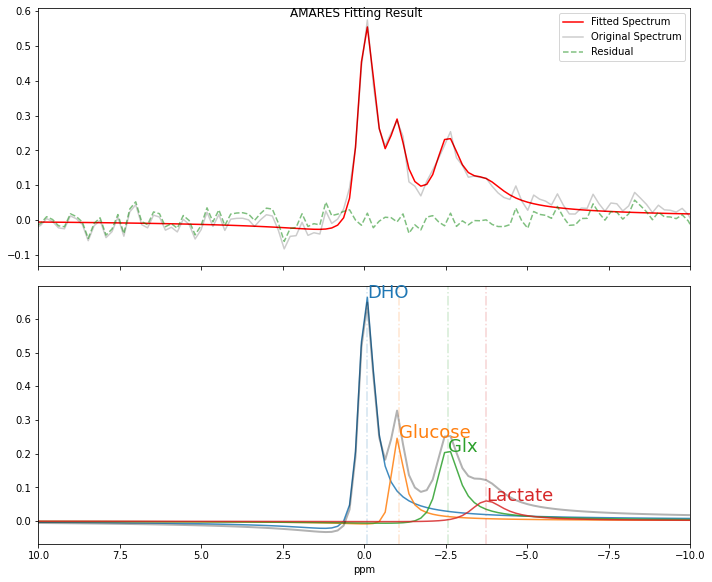

In [16]:
out1 = pyAMARES.fitAMARES(fid_parameters=FIDobj, 
                          fitting_parameters=FIDobj.initialParams,
                          method='least_squares',
                          ifplot=True,
                          inplace=False,
                          initialize_with_lm=True)  # Levenberg-Marquardt initializer is executed internally

- **Visualization of AMARES Fitting as shown in Figure 2D** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [24]:
# Modify the visualization parameters
plotParameters = out1.plotParameters
plotParameters.ifphase = False  # Do not apply phase correction
plotParameters.lb = 5.          # Apply line broadening of 5 Hz for visualization
plotParameters.xlim = (10, -10) # Show spectrum from 10 to -10 ppm

fitting_parameters is None, just use the fid_parameters.out_obj.params


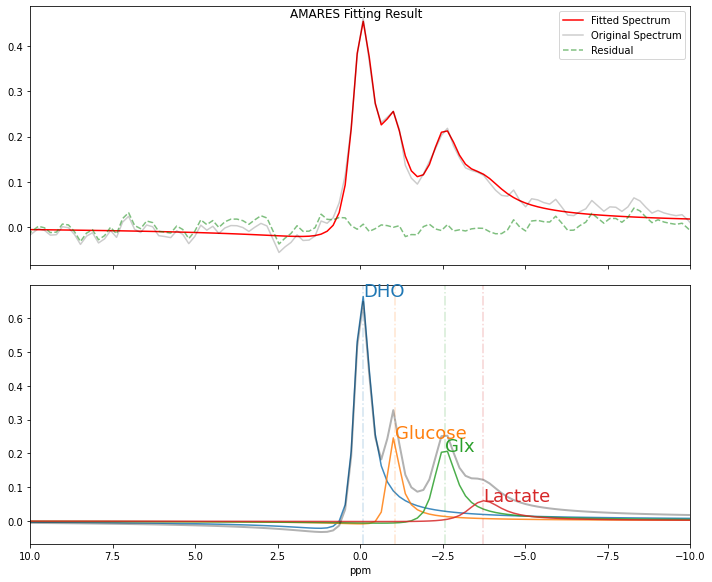

In [25]:
pyAMARES.plotAMARES(fid_parameters=out1, plotParameters=plotParameters)

- **Obtained Fitting Results Spreadsheet as shown in Figure S2D** of [pyAMARES Publication](https://doi.org/10.3390/diagnostics14232668)

In [26]:
out1.simple_df

,amplitude,chem shift(ppm),LW(Hz),phase(deg),SNR,CRLB(%)
name,,,,,,
DHO,0.004,-0.090,39.679,-19.241,2.361,4.619
Glucose,0.001,-1.052,30.113,-19.241,0.682,13.969
Glx,0.002,-2.571,60.789,-19.241,1.088,19.562
Lactate,0.001,-3.733,100.000,-19.241,0.476,54.700
